In [36]:
import csv
import datetime
import os
import matplotlib.pyplot as plt

import pandas as pd

input_folder = "data/aggregated"
files = os.listdir(input_folder)

In [54]:
"""
created the describe dataset, with mean SATD values per project
"""

from pandas import DataFrame

def create_row(name: str, df: DataFrame):
    return [
        name,
        df["code|design-debt"].mean(),
        df["requirement-debt"].mean(),
        df["documentation-debt"].mean(),
        df["test-debt"].mean(),
        datetime.datetime.fromtimestamp(df["timestamp"].min())]


with open("data/describe.csv", mode="w") as file:
    writer = csv.writer(file)
    writer.writerow(["project", "mean-code|design-debt", "mean-requirement-debt", "mean-documentation-debt", "mean-test-debt", "first-commit-at"])
    for file in files:
        name = file.split(".")[0].split("_")[0]
        df = pd.read_csv(f"{input_folder}/{file}")
        writer.writerow(create_row(name, df))
    

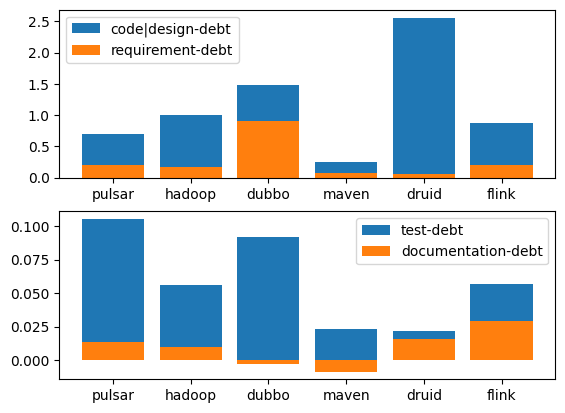

In [68]:
df = (pd.read_csv("data/describe.csv"))

fig, axs = plt.subplots(2)

axs[0].bar(df["project"], df["mean-code|design-debt"], label="code|design-debt")
axs[0].bar(df["project"], df["mean-requirement-debt"], label="requirement-debt")
axs[1].bar(df["project"], df["mean-test-debt"], label="test-debt")
axs[1].bar(df["project"], df["mean-documentation-debt"], label="documentation-debt")
axs[0].legend()
axs[1].legend()
# plt.yscale("log")

plt.show()